# Лабораторная работа 1. Введение в цифровую обработку изображений.

В этой работе рассматриваются базовые операции линейной алгебры, NumPy и OpenCV.

Цель лабораторной работы: получить навыки работы с линейной алгеброй и базовыми операциями с изображениями в Python.


#

Настроим Jupyter на отображение полного интерактивного вывода:

#

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

# 1. NumPy

NumPy -- библиотека, предоставляющая реализации алгоритмов, оптимизированных для работы с многомерными массивами. NumPy основан на библиотеке LAPACK, что делает вычисления быстрыми.

Кроме базового варианта (многомерные массивы в базовом варианте) NumPy включает в себя набор пакетов для решения специализированных задач, например:

- numpy.linalg — реализует операции линейной алгебры (простое умножение векторов и матриц есть в базовом варианте);
- numpy.random — реализует функции для работы со случайными величинами.

NumPy Array vs Python List:
- NumPy быстрее чем обычные списки в случаях, когда операции могут быть векторизованы.
- Добавление элементов в существующий массив медленнее в NumPy, по сравнению с Python List. Операция добавления элемента в массив NumPy имеет сложность O(N), а в Python List -- O(1).
- Массивы NumPy могут работать с элементами только одного типа.

Документацию по NumPy можно найти [здесь](https://numpy.org/devdocs/reference/index.html#reference)

## 1.1 Установка и подключение библиотеки
Для установки библиотеки NumPy выполнить команду ниже. Восклицательный знак позволяет выполнять команды терминала в Jupyter Notebook. Для выполнения команды в терминале восклицательный знак нужно убрать.


In [ ]:
!pip3 install numpy

^C


### Подключение библиотеки в коде
Для использования библиотеки NumPy сначала подключим ее.

In [1]:
import numpy as np

## 1.2 Создание массивов
Существуют несколько способов создания массивов.

### 1.2.1. Создание массива из списка

**Создание векторов:**

In [ ]:
a = np.array([1, 2, 3])  # int32 array
b = np.array([1., 2., 3.])  # float64 array
c = np.array([1, 2, 3], int)  # int32 array
d = np.array([1, 2, 3], float)  # float64 array
e = np.array([1, 2, 3], np.dtype('f'))  # float32 array
print(a)

[1 2 3]


 Больше про типы можно прочитать в [документации](https://numpy.org/doc/stable/reference/arrays.dtypes.html).

**Создание матриц:**

In [ ]:
f = np.array([[1., 2., 3.],
              [4., 5., 6.],
              [7., 8., 9.]])
print(f)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


**Создание трехмерного массива:**

In [ ]:
g = np.array([[[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]],
              [[11, 12, 13],
               [14, 15, 16],
               [17, 18, 19]]])

Подобным образом в NumPy возможно создавать массивы больших размерностей.

### 1.2.2. Создание пустых и заполненных значениями массивов

Массивы NumPy не могут расширяться так, как это делает список Python, т.к. в конце массива не зарезервировано место для быстрого добавления. Поэтому обычной практикой является либо расширение списка Python и преобразование его в массив NumPy, либо предварительное выделение необходимого пространства с помощью `np.zeros` или `np.empty`.

In [ ]:
a = np.zeros(3, int)  # нулевой одномерный массив размерности 3
b = np.empty(3, int)  # пустой одномерный массив размерности 3
c = np.ones(3)  # массив, заполненный единицами
d = np.full(3, 7.)  # массив, заполненный значением 7

e = np.zeros_like(a)  # создание нулевого массива, по размерности и типу совпадающего с 'a'
f = np.empty_like(b)  # создание пустого массива, по размерности и типу совпадающего с 'b'
g = np.ones_like(c)  # создание единичного массива, по размерности и типу совпадающего с 'c'
h = np.full_like(d, 8)  # создание заполненного массива, по размерности и типу совпадающего с 'd'
print(b)

[1 2 3]


Чтобы создать массив нужно указать две размерности при помощи кортежа (в скобках):

In [ ]:
k = np.ones((3, 2))
print(k)

[[1. 1.]
 [1. 1.]
 [1. 1.]]


Подобным образом, с матрицами работают методы np.zeros(), np.empty(), np.full и их сопутствующие функции np.zeros_like(), np.empty_like(), np.ones_like(), np.full_like().

Для создания единичной матрицы существует метод np.eye():

In [ ]:
a = np.eye(3, 3)
print(a)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


**Инициализация массива последовательностью чисел** осуществляется методами `np.arange()` и `np.linspace()`.
`np.arange(stop)` -- создает массив чисел с последовательностью от 0 до значения stop.
`np.arange(start, stop)` -- создает массив чисел от значения start до значения stop.
`np.arange(start, stop, step)` -- создает массив чисел от start до stop c шагом step.

`np.linspace(start, stop, n)` -- создает массив размерности n со значениями от start до stop. Шаг последовательности вычисляется автоматически.


In [ ]:
a = np.arange(6)
b = np.arange(2, 6)
c = np.linspace(0, 0.5, 6)

print('a =', a)
print('b =', b)
print('c =', c)

a = [0 1 2 3 4 5]
b = [2 3 4 5]
c = [0.  0.1 0.2 0.3 0.4 0.5]


Также возможно создать массив, заполненный случайными значениями:
`rnd = np.random.default_rng()` -- создание генератора
`rnd.integers(min, max, n)` -- возвращает массив  размерности n случайных равномерно расспределенных целых чисел, где x ∈ [min, max).
`rnd.integers(min, max, n, endpoint=True)` -- возвращает массив размерности n случайных равномерно расспределенных целых чисел, где x ∈ [min, max].
`rnd.random(n)` -- возвращает массив размерности n случайных равномерно расспределенных вещественных чисел, где x ∈ [min, max).
`rnd.uniform(min, max, n)` -- возвращает массив размерности n случайных равномерно расспределенных вещественных чисел, где x ∈ [min, max).
`rnd.standard_normal(n)` -- возвращает массив размерности n случайных нормально распределенных вещественных чисел, где μ=0, σ=1.
`rnd.normal(μ, σ, n)` -- возвращает массив размерности n случайных нормально распределенных вещественных чисел с заданными μ и σ.



In [ ]:
rnd = np.random.default_rng()
a = rnd.integers(0, 10, 3)
b = rnd.integers(0, 10, 3, endpoint=True)
c = rnd.random(3)
d = rnd.uniform(1, 10, 3)
e = rnd.standard_normal(3)
f = rnd.normal(5, 2, 3)

Аналогичным образом можно создать заполненную случайными числами матрицу. Размерность также указывается кортежем (в скобках):


In [ ]:
rnd = np.random.default_rng()
a = rnd.integers(0, 10, (3, 2))
b = rnd.integers(0, 10, (3, 2), endpoint=True)
c = rnd.random((3, 2))
d = rnd.uniform(1, 10, (3, 2))
e = rnd.standard_normal((3, 2))
f = rnd.normal(5, 2, (3, 2))

### 1.2.3 reshape() -- функция изменение формы массива

функция reshape() позволяет преобразовать одномерный массив в двухмерный (в общем случае в n-мерный) и обратно.
<img height="100" src="https://drive.google.com/uc?id=1WBAo_xEHVYfzq8NrzexUtoCIiauFm0eR"/>

In [ ]:
a = np.arange(1, 7)
b = a.reshape(2, 3)
c = a.reshape(2, -1)
d = b.reshape(-1)

print('a = ', a, sep='\n')
print('b =', b, sep='\n')
print('c =', c, sep='\n')
print('d =', d, sep='\n')

a = 
[1 2 3 4 5 6]
b =
[[1 2 3]
 [4 5 6]]
c =
[[1 2 3]
 [4 5 6]]
d =
[1 2 3 4 5 6]


## 1.3 Доступ к данным массива

Обратиться к данным массива можно используя индексацию, в том числе используя срезы.

In [ ]:
a = np.arange(1, 6)
print('a =', a)
print('a[1] =', a[1])
print('a[2:4] =', a[2:4])
print('a[-2:] =', a[-2:])
print('a[::2] =', a[::2])

a[0] = 10  # запись в нулевую ячейку значения 10
print('a =', a)

a = [1 2 3 4 5]
a[1] = 2
a[2:4] = [3 4]
a[-2:] = [4 5]
a[::2] = [1 3 5]
a = [10  2  3  4  5]


Также возможно использовать **булеву индексацию**:
<img alt="boolean_indexing" src="https://drive.google.com/uc?id=11mcWAqmff7NRd0_qijg5Tec8eDDstulJ" width="600"/>

In [ ]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
b = np.copy(a)
a[a > 5] = 0
b[(b >= 3) & (b <= 5)] = 0
print('a =', a)
print('b =', b)

a = [1 2 3 4 5 0 0 0 5 4 3 2 1]
b = [1 2 0 0 0 6 7 6 0 0 0 2 1]


Примеры **индексации элементов матриц**:

<img height="250" src="https://drive.google.com/uc?id=11mcWAqmff7NRd0_qijg5Tec8eDDstulJ"/>

In [ ]:
a = np.arange(1, 13).reshape(3, 4)  # reshape изменяет размерность массива
print('a =\n', a)
print('a[1,2] =', a[1, 2])
print('a[1,:] =', a[1, :])
print('a[1,2] =', a[:, 2])
print('a[:,1:3] =\n', a[:, 1:3])
print('a[-2:,-2:] =\n', a[-2:, -2:])
print('a[::2,1::2] =\n', a[::2, 1::2])

a =
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
a[1,2] = 7
a[1,:] = [5 6 7 8]
a[1,2] = [ 3  7 11]
a[:,1:3] =
 [[ 2  3]
 [ 6  7]
 [10 11]]
a[-2:,-2:] =
 [[ 7  8]
 [11 12]]
a[::2,1::2] =
 [[ 2  4]
 [10 12]]


### 1.3.1. Копирование элементов массива
Нужно помнить, что массив NumPy является объектом, а значит простое присвоение массива новой переменной копирует не значения массива, а ссылку на объект массива.
Рассмотрим пример:

In [ ]:
a = np.array([1, 2, 3])
b = a  # здесь копируется не массив, а ссылка на него!
b[0] = 10  # Теперь изменим первый элемент массива на значение 10 и выведем содержимое a и b.
print('a =', a)
print('b =', b)

a = [10  2  3]
b = [10  2  3]


 Для копирования массива следует использовать метод **copy()**.

In [ ]:
a = np.array([1, 2, 3])
b = a.copy()
b[0] = 10
print('a =', a)
print('b =', b)

a = [1 2 3]
b = [10  2  3]


### 1.3.2 Вставка и добавление элементов массива
Для вставки и добавления элементов массива следует использовать методы `insert()` и `append()`

In [ ]:
a = np.array([1, 2, 3])
b = np.insert(a, 1, [4, 5, 6])
c = np.append(a, [4, 5, 6])
print('b =', b)
print('c =', c)

b = [1 4 5 6 2 3]
c = [1 2 3 4 5 6]


## 1.4 Векторные операции
NumPy позволяет осуществлять векторные операции, т.е. арифметические, логические операции между вектором (массивом) и числом или двумя векторами, а также операции векторной алгебры.

### 1.4.1 Операции над вектором и числом

In [ ]:
a = np.array([1, 2, 3])
b = 3

print('a + b =', a + b)
print('a - b =', a - b)
print('a * b =', a * b)
print('a / b =', a / b)
print('a // b =', a // b)


a + b = [4 5 6]
a - b = [-2 -1  0]
a * b = [3 6 9]
a / b = [0.33333333 0.66666667 1.        ]
a // b = [0 0 1]


### 1.4.2. Операции над векторами

In [ ]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print('a + b =', a + b)
print('a - b =', a - b)
print('a * b =', a * b)
print('a / b =', a / b)
print('a // b =', a // b)

a + b = [5 7 9]
a - b = [-3 -3 -3]
a * b = [ 4 10 18]
a / b = [0.25 0.4  0.5 ]
a // b = [0 0 0]


### 1.4.3 Математические функции над векторами

In [ ]:
a = np.array([1, 2, 3])

print('a^2 =', a ** 2)
print('√a =', np.sqrt(a))
print('e^a =', np.exp(a))
print('ln(a) =', np.log(a))
print('sin(a) =', np.sin(a))

a^2 = [1 4 9]
√a = [1.         1.41421356 1.73205081]
e^a = [ 2.71828183  7.3890561  20.08553692]
ln(a) = [0.         0.69314718 1.09861229]
sin(a) = [0.84147098 0.90929743 0.14112001]


### 1.4.4. Векторные операции

In [ ]:
a = np.array([1, 2])
b = np.array([3, 4])

print('a∙b =', np.dot(a, b))
print('a⨉b =', np.cross(a, b))

a∙b = 11
a⨉b = -2


### 1.4.5 Иные функции над векторами
К векторам также возможно применение функций:
- округления: np.floor(), np.ceil(), np.round();
- статистики: np.max(), np.min(), np.sum(), np.mean(), np.std() и др.;
- сортировки: np.sort();
- поиска: np.where();
- сравнения вещественных чисел: np.allclose(), np.isclose()

**Добавьте примеры использования этих функций самостоятельно**.

## 1.5 Матричные операции
NumPy позволяет осуществлять также и матричные операции.
Среди ни нужно отметить следующие:
A * B -- операция поэлементного умножения;
A @ B -- операция матричного умножения;
A / B -- операция матричного деления.

In [ ]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[2, 0], [0, 2]])

print('b + a =', b + a, sep='\n')
print('b - a =', b - a, sep='\n')
print('b * a =', b * a, sep='\n')
print('b @ a =', b @ a, sep='\n')
print('b / a =', b / a, sep='\n')
print('b // a =', b // a, sep='\n')

b + a =
[[3 2]
 [3 6]]
b - a =
[[ 1 -2]
 [-3 -2]]
b * a =
[[2 0]
 [0 8]]
b @ a =
[[2 4]
 [6 8]]
b / a =
[[2.  0. ]
 [0.  0.5]]
b // a =
[[2 0]
 [0 0]]


### 1.5.1 Транспонирование
Транспонирование матрицы осуществляется двумя способами:
a.transpose() или a.T

**Транспонирование векторов работает иначе**. Если попробовать применить транспонирование, например, к вектору-строке:
    `a = np.array([1, 2, 3])`
    `a.T`
то ничено не изменится. Вектор, как был строкой, так строкой и остался. Это происходит потому, что массив `a` имеет только одну размерность.
Самым простым способом транспонирования, является смена размерности:
`a.reshape(-1, 1)`
здесь -1 -- говорит NumPy вычислять размер автоматически



In [ ]:
a = np.array([1, 2, 3])
b = a.reshape(-1, 1)
print(b)
print('a * b =\n', a * b)

[[1]
 [2]
 [3]]
a * b =
 [[1 2 3]
 [2 4 6]
 [3 6 9]]


### 1.5.2 Смешанные операции между вектором и матрицей
NumPy также допускает смешанные операции между вектором и матрицей
<img height="300" src="https://drive.google.com/uc?id=1y_TUJA7e_e0lhRPy8L6RYBfx7KzwCf7U"/>


In [ ]:
a = np.arange(1, 10).reshape(3, 3)
print('a / 9 =', a / 9, sep='\n')
print('a * [-1,0,1] =', a * np.array([-1, 0, 1]), sep='\n')
b = a / (np.array([3, 6, 9]).reshape(-1, 1))
print('a / [3 6 9]T =', b, sep='\n')
print('[1 2 3] * [1 2 3]T =', np.array([1, 2, 3] * np.array([1, 2, 3]).reshape(-1, 1)), sep='\n')
c = np.array([1, 2, 3]).reshape(-1, 1) * np.array([1, 2, 3])
print('c = \n', c)
# print(a / np.array([1, [3, 6, 9]]))

a / 9 =
[[0.11111111 0.22222222 0.33333333]
 [0.44444444 0.55555556 0.66666667]
 [0.77777778 0.88888889 1.        ]]
a * [-1,0,1] =
[[-1  0  3]
 [-4  0  6]
 [-7  0  9]]
a / [3 6 9]T =
[[0.33333333 0.66666667 1.        ]
 [0.66666667 0.83333333 1.        ]
 [0.77777778 0.88888889 1.        ]]
[1 2 3] * [1 2 3]T =
[[1 2 3]
 [2 4 6]
 [3 6 9]]
c = 
 [[1 2 3]
 [2 4 6]
 [3 6 9]]


### 1.5.3 Манипуляции над матрицами

#### 1.5.3.1 Функции объединения массивов
<img height="300" src="https://drive.google.com/uc?id=1_O7thGJMM9_9L1mjpoqwBk32c_pB1fjx"/>

In [ ]:
a = np.arange(1, 13).reshape(3, -1)
b = np.arange(1, 9).reshape(2, -1)
c = np.arange(1, 7).reshape(3, -1)
print('vstack((a,b)) =', np.vstack((a, b)), sep='\n')
print('hstack((a,c)) =', np.hstack((a, c)), sep='\n')

vstack((a,b)) =
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]
 [ 5  6  7  8]]
hstack((a,c)) =
[[ 1  2  3  4  1  2]
 [ 5  6  7  8  3  4]
 [ 9 10 11 12  5  6]]


**Функции объединения матрицы с векторами:**

<img height="300" src="https://drive.google.com/uc?id=101Af2ojgEhdtZK9QIBjRaZnIIqWllplU"/>

Здесь нужно быть внимательным и помнить, что при операции hstack нужно создать именно вектор-стобец, добавив вторую размерность при помощи метода reshape(-1,1) или c[:, None]. Если нужно использовать именно вектор-строку, то вместо метода hstack() нужно использовать метод column_stack().


In [ ]:
a = np.arange(1, 13).reshape(3, -1)
b = np.arange(1, 5)
c = np.array([1, 3, 5])
print('vstack((a,b)) =', np.vstack((a, b)), sep='\n')
print('hstack((a,c)) =', np.hstack((a, c[:, None])), sep='\n')

vstack((a,b)) =
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [ 1  2  3  4]]
hstack((a,c)) =
[[ 1  2  3  4  1]
 [ 5  6  7  8  3]
 [ 9 10 11 12  5]]


#### 1.5.3.2 Функции расщепления массивов
Обратной операцией объединения массивов (векторов) является операция расщепления массивов (методы `hsplit()` и `vsplit()`).

In [ ]:
a = np.arange(1, 13).reshape(3, -1)
b = np.arange(1, 9).reshape(2, -1)
c = np.arange(1, 7).reshape(3, -1)
d = np.vstack((a, b))
e = np.hstack((a, c))
print('vsplit(d,[3])) =', np.vsplit(d, [3]), sep='\n')
print('hsplit((e,[4]])) =', np.hsplit(e, [4]), sep='\n')


vsplit(d,[3])) =
[array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]]), array([[1, 2, 3, 4],
       [5, 6, 7, 8]])]
hsplit((e,[4]])) =
[array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]]), array([[1, 2],
       [3, 4],
       [5, 6]])]


#### 1.5.3.3 Иные операции манипуляции над массивами
Существуют и другие операции манипуляций над массивами:
- репликация матрицы (`np.tile()`, `np.repeat()`);
- удаление столбцов и строк матрицы (`np.delete()`);
- вставка столбцов и строк матрицы (`np.insert()`);
- добавление столбцов и строк к матрице (`np.append()`);
- добавление граничных значений к матрице (`np.pad()`).

Рассмотрите и создайте примеры их использования самостоятельно.

## 1.6 Сохранение и загрузка данных на диск

### 1.6.1 Сохранение и загрузка NumPy массивов

Для сохранения массивов на накопитель в NumPy предусмотрен метод `np.savez(). Первым аргументом передается название файла. Последующими аргументами указываются данные в виде ключ-значение, где в качестве ключа указывается именование данных в файле, а значением -- имя переменной, хранящей данные.

In [ ]:
np.savez("mas.npz", a=a, b=b)
np.savez("mas2.npz", nameOfVar1=a, nameOfVar2=b)

In [ ]:
# %reset_selective [a, b, c, d, e]
%reset

UsageError: Line magic function `%` not found.


Загрузка массивов осуществляется функцией np.load(), где в качестве аргумента передается имя файла.

In [ ]:
import numpy as np  #снова подключаем numpy

loadMas = np.load("mas.npz")
loadMas2 = np.load("mas2.npz")
print(loadMas.files)
print(loadMas2.files)
a = loadMas["a"]
b = loadMas2["nameOfVar2"]

### 1.6.2 Сохранение/загрузка данных в файл MatLAB (.mat)
Для работы с файлами MatLAB нужно подключить библиотеку scipy.

In [ ]:
import scipy.io as sio

Сохранение данных в файл .mat осуществляется функцией savemat(), где в качестве аргументов передаются название файла и данные в виде ключ-значение

In [ ]:
sio.savemat('test.mat', {'a': a})

Чтение файла .mat осуществляетя функцией loadmat().

In [ ]:
testMat = sio.loadmat('test.mat')

In [ ]:
a = testMat['a']

## 1.7 Приведение типов в NumPy
При работе с изображениями, видео или просто с матрицами больших размеров, может требоваться точное управление типами данных. В отличие от чистого Python, который предоставляет лишь несколько числовых типов, NumPy предоставляет более широкий перечень типов.

В NumPy доступны следующие типы данных:

- bool_ - Логический тип (истина или ложь), хранящийся в виде байта.
- int_ - Целочисленный тип установленный по умолчанию (такой же, как C long, как правило это либо int64 либо int32).
- intc - Идентичен C int (int32 или int64).
- intp - Целочисленный тип, используемый для индексирования (такой же, как C ssize_t, как правило это либо int64 либо int32).
- int8 - Целые числа в диапазоне от -128 по 127 (числа размером 1 байт).
- int16 - Целые числа в диапазоне от -32768 по 32767, (числа размером 2 байта).
- int32 - Целые числа в диапазоне от -2147483648 по 2147483647, (числа размером 4 байта).
- int64 - Целые числа в диапазоне от -9223372036854775808 по 9223372036854775807, (числа размером 8 байт).
- uint8 - Целые числа в диапазоне от 0 по 255 (числа размером 1 байт).
- uint16 - Целые числа в диапазоне от 0 по 65535 (числа размером 2 байта).
- uint32 - Целые числа в диапазоне от 0 по 4294967295 (числа размером 4 байта).
- uint64 - Целые числа в диапазоне от 0 по 18446744073709551615 (числа размером 8 байт).
- float_ - То же самое что и float64.
- float16 - Вещественные числа половинной точности: 1 бит знака, 5 бит экспоненты 10 бит мантисы (числа размером 2 байта).
- float32 - Вещественные числа одинарной точности: 1 бит знака, 8 бит экспоненты 23 бита мантисы (числа размером 4 байта).
- float64 - Вещественные числа двойной точности: 1 бит знака, 11 бит экспоненты, 52 бита мантисы (числа размером 8 байт).
- complex_ - То же самое что и complex128.
- complex64 - Комплексные числа в которых действительная и мнимая части представлены двумя вещественными числами типа float32.
- complex128 - Комплексные числа в которых действительная и мнимая части представлены двумя вещественными числами типа float64.

Полный перечень типов можно посмотреть, если вывести содержимое словаря np.sctypeDict.

In [ ]:
np.sctypeDict

{'?': numpy.bool_,
 0: numpy.bool_,
 'byte': numpy.int8,
 'b': numpy.int8,
 1: numpy.int8,
 'ubyte': numpy.uint8,
 'B': numpy.uint8,
 2: numpy.uint8,
 'short': numpy.int16,
 'h': numpy.int16,
 3: numpy.int16,
 'ushort': numpy.uint16,
 'H': numpy.uint16,
 4: numpy.uint16,
 'i': numpy.intc,
 5: numpy.intc,
 'uint': numpy.uint32,
 'I': numpy.uintc,
 6: numpy.uintc,
 'intp': numpy.int64,
 'p': numpy.int64,
 9: numpy.int64,
 'uintp': numpy.uint64,
 'P': numpy.uint64,
 10: numpy.uint64,
 'long': numpy.int32,
 'l': numpy.int32,
 7: numpy.int32,
 'L': numpy.uint32,
 8: numpy.uint32,
 'longlong': numpy.int64,
 'q': numpy.int64,
 'ulonglong': numpy.uint64,
 'Q': numpy.uint64,
 'half': numpy.float16,
 'e': numpy.float16,
 23: numpy.float16,
 'f': numpy.float32,
 11: numpy.float32,
 'double': numpy.float64,
 'd': numpy.float64,
 12: numpy.float64,
 'longdouble': numpy.longdouble,
 'g': numpy.longdouble,
 13: numpy.longdouble,
 'cfloat': numpy.complex128,
 'F': numpy.complex64,
 14: numpy.complex64

Если импортировать NumPy как `import numpy as np`, то объекты типа данных становятся доступны как np.bool_, np.float64, np.int16 и т.д.

Для преобразования одного типа данных в другой можно так же воспользоваться объектами типа данных:
- np.float64(11)
- np.int64(11)
- np.float64([1, 2, 3])
- np.int16([1, 2, 3])

или воспользоваться методом astype():

In [ ]:
a = np.float64([1, 2, 3])
a.astype(np.uint8)

array([1, 2, 3], dtype=uint8)


Если нужна информация о каком-то конкретном типе чисел с плавающей запятой, то ее можно запросить с помощью функции finfo():
- np.finfo(np.float64)
- np.finfo(np.floаt)
- np.finfo(np.float16)

In [ ]:
np.finfo(np.float64)

finfo(resolution=1e-15, min=-1.7976931348623157e+308, max=1.7976931348623157e+308, dtype=float64)

Иногда бывает очень полезно узнать размер массива в байтах:

In [ ]:
a = np.arange(5, dtype=np.float64)
a
a.size  #  Общее количество элементов в массиве
a.itemsize  #  Размер одного элемента в байтах
a.size * a.itemsize

array([0., 1., 2., 3., 4.])

5

8

40

# 2. OpenCV
Работать с изображениями удобнее всего при помощи opencv-python. OpenCV -- реализация библиотеки алгоритмов компьютерного зрения, обработки изображений и численных алгоритмов общего назначения. opencv-python является оберткой реализации Оригинальной библиотеки OpenCV, написанной на языке C++, что делает его таким же быстрым. Все структуры массивов opencv-python (далее просто OpenCV) преобразуются в массивы Numpy и из них. Это также облегчает интеграцию с другими библиотеками, использующими Numpy, такими как SciPy и Matplotlib.

OpenCV предлагает широкий набор алгоритмов и состоит из следующих модулей:
- core -- основная функциональность. Включает в себя базовые структуры, вычисления (математические функции, генераторы случайных чисел) и линейную алгебру и пр.;
- imgproc -- обработка изображений (фильтрация, геометрические преобразования, преобразование цветовых пространств и т. д.);
- imgcodecs -- чтение и запись файлов изображений;
- videoio -- чтение и запись видео или последовательности изображений;
- highgui -- создание простого пользовательского интерфейса и обработка событий мыши и клавиатуры;
- video -- обработка видео;
- calib3d -- калибровка камер и 3D реконструкция;
- features2d -- работа с особыми точками;
- objdetect -- обнаружение объектов;
- dnn -- глубокие нейронные сети;
- ml -- машинное обучение;
- stitching -- склейка изображений;
и других.

Документацию по OpenCV-Python v4.5.5 можно найти [здесь](https://docs.opencv.org/4.5.5/d6/d00/tutorial_py_root.html)
Документация по OpenCV разных версий можно найти [здесь](https://docs.opencv.org/)

## 2.1 Установка и подключение opencv-python
установку пакета opencv-python можно осуществить в терминале командой:
pip3 install opencv-python

Подключение библиотеки:

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


## 2.2. Загрузка и просмотр изображений

In [ ]:
image = cv.imread('imgs/lenna.png')

Без операций cv.waitKey(0) и cv.destroyAllWindows() окно может закрываться не корректно.

Вынесем этот код в функцию show_image() и display_image() в файл "utility/util.py". Подключим созданные файлы к текущему коду:

In [ ]:
#from utility import util

Еще одним способом отображения изображений является использование библиотеки matplotlib подключим ее и выведем тестовое изображение:

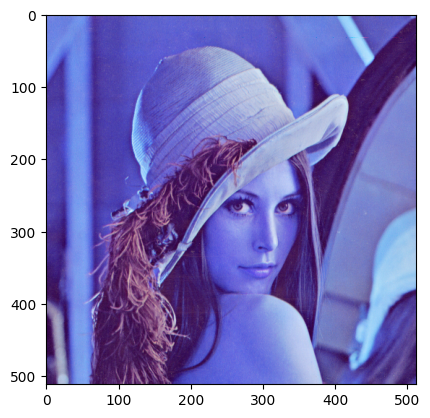

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#%matplotlib inline позволяет выводить графики matplotlib в Jupyter
plt.imshow(image)

По умолчанию, при чтении файла изображения методом cv.imread() изображение находится в цветовом пространстве не RGB (как все привыкли), а BGR, т.е. цвета идут в другом порядке. Эта особенность является причиной не корректного вывода изображения при помощи matplotlib, т.к. он выводит изображение в цветовом пространстве RGB.
Чтобы поменять цветовое пространство на RGB можно воспользоваться методом:
`rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)`

Проверим этот факт загрузив изображение с пикселями синего цвета:

In [ ]:
blue_image = image = cv.imread('imgs/lenna.png')

Выведем пиксел с координатами (0,0) изображения в виде массива NumPy:

In [ ]:
blue_image[0, 0, :]

array([255,   0,   0], dtype=uint8)

Действительно, пиксель имеют максимальную яркость только по первому каналу. Значит первый канал хранит синий цвет.
Преобразуем цветовое пространство BGR в RGB:

In [ ]:
rgb_blue_image = cv.cvtColor(blue_image, cv.COLOR_BGR2RGB)
rgb_blue_image[0, 0, :]

array([  0,   0, 255], dtype=uint8)

Проделаем то же самое для тестового изображения:

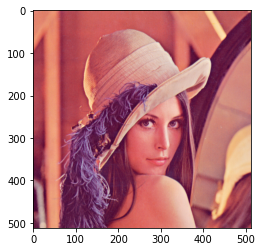

In [ ]:
rgb_image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(rgb_image)

## 2.3. Простые операции с изображениями

### 2.3.1 Кадрирование или ROI
**Кадрирование** -- усечение изображения с целью выделения объекта интереса.
**ROI** (Region Of Interest, объект интереса) -- границы изображения объекта интереса.
Поскольку цветное изображение является 3-х мерным массивом NumPy, то кадрировать (т.е. обрезать) такое изображение можно при помощи срезов:

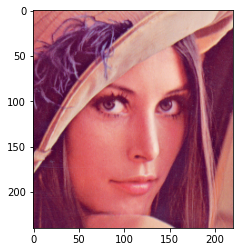

In [ ]:
ROI = (182, 162, 220, 240)  #(x0, y0, height, width)
cropped_image = rgb_image[ROI[1]:ROI[1] + ROI[3], ROI[0]:ROI[0] + ROI[2]]
plt.imshow(cropped_image)

### 2.3.2 Изменение размера изображения



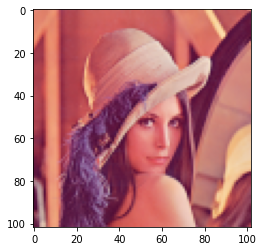

In [ ]:
scale_percent = 20  # Процент от изначального размера
width = int(rgb_image.shape[1] * scale_percent / 100)
height = int(rgb_image.shape[0] * scale_percent / 100)
dim = (width, height)
resized_image = cv.resize(rgb_image, dim, interpolation=cv.INTER_AREA)
plt.imshow(resized_image)

### 2.3.3 Поворот изображения

Вращение изображения – это одно из аффинных преобразований. Его удобно определять матрицей перехода. Подробнее  стоит почитать в статье [Матрица перехода — Википедия (wikipedia.org)](https://ru.wikipedia.org/wiki/Матрица_перехода). В случае вращения матрица перехода вычисляется функцией cv.getRotationMatrix2D(center, angle, scale), где center и angle – координаты центра и угол вращения, а scale – коэффициент масштабирования. Справку по вращению изображений и другим геометрическим трансформациям можно посмотреть в [документации](https://docs.opencv.org/3.4/da/d54/group__imgproc__transform.html)

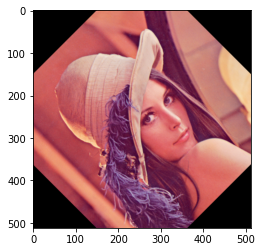

In [ ]:
(h, w, d) = rgb_image.shape
angle = 45
scale = 1.0
center = (w // 2, h // 2)
M = cv.getRotationMatrix2D(center, angle, scale)
rotated = cv.warpAffine(rgb_image, M, (w, h))
plt.imshow(rotated)

### 2.3.4 Рисование примитивов на изображении:
- cv.line(image, startPoint, endPoint, rgb_color, thickness)
- cv.rectangle(image, topLeft, bottomRight, rgb_color, thickness)
- cv.circle(image, center, radius, rgb_color, thickness)
- cv.ellipse(image, center, axes, angle, startAngle, endAngle, rgb_color, thickness)

где:
- image -- изображение
- startPoint, endPoint -- координаты начальной и конечной точек;
- rgb_color -- код цвета в формате rgb координат (red, green, blue). red, green, blue ∈ [0, 255];
- thickness -- толщина линии в пикселях;
- center -- координаты центра окружности или эллипса;
- topLeft, bottomRight -- координаты верхней левой и нижней правой точек прямоугольника, соответственно.

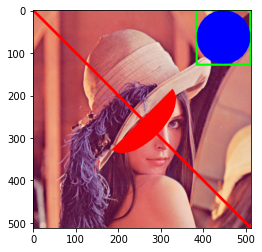

In [ ]:
copy_image = rgb_image.copy()

# рисование линии
cv.line(copy_image, (0, 0), (511, 511), (255, 0, 0), 5)
# => Diagonal red line with thickness of 5 px

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv.rectangle(copy_image, (384, 0), (510, 128), (0, 255, 0), 3)
# => Green rectangle with thickness of 3 px

# Draw a circle using cv2.circle(image, center, radius, rgb, thinkness)
cv.circle(copy_image, (447, 63), 63, (0, 0, 255), -1)
# => Blue filled circle(note that the thinkness is -1)

# Draw a ellipse using cv2.ellipse(image, center, axes, angle, startAngle, endAngle, rgb, thinkness)
cv.ellipse(copy_image, (256, 256), (100, 50), -45, 0, 180, (255, 0, 0), -1)
# => Red wide down-half ellipse

plt.imshow(copy_image)

### 2.3.5 Наложение текста на изображение

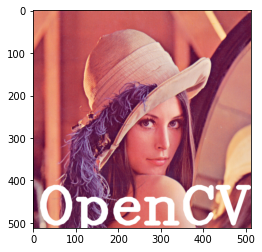

In [ ]:
# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
copy_image = rgb_image.copy()
font = cv.FONT_HERSHEY_COMPLEX
cv.putText(rgb_image, 'OpenCV', (10, 500), font, 4, (255, 255, 255), 10, cv.LINE_AA)
# => White 'OpenCV' text at the bottom

plt.imshow(rgb_image)

## 2.4 Цветовые модели

Цветные цифровые изображения представляют собой совокупность трех цветовых плоскостей, каждая из которых характеризует одну независимую составляющую цвета, представленную в том же формате, что и обычное 8-битное полутоновое изображение.

### 2.4.1 Цветовая модель RGB

RGB (Red, Green, Blue - красный, зеленый, синий) - цветовая модель, описывающая способ кодирования цвета для цветовоспроизведения с помощью трёх цветов, которые принято называть основными. Выбор основных цветов обусловлен особенностями физиологии восприятия цвета сетчаткой человеческого глаза. Сетчатка глаза имеет три вида рецепторов (колбочек), ответственных за цветное зрение. Можно считать, что каждый вид колбочек даёт свой отклик на определённую длину волны видимого спектра.
 Система координат RGB - куб с началом отсчета ⟨0,0,0⟩, соответствующим черному цвету. Максимальное значение RGB - ⟨255,255,255⟩ соответствует белому цвету.

<img src="../content/RGB_color_cube.png" width="800"/>

В модели RGB не разделены яркостная и оттеночная компоненты цвета, здесь легко указать яркости для одного из основных цветов, но затруднительно указать оттенок с требуемым цветовым тоном (например, телесным) и насыщенностью.

### 2.4.2 Цветовые модели HSV и HSI

 Цветовая модель HSV (Hue, Saturation, Value - цветовой тон, насыщенность, мера яркости) - модель, ориентированная на человека и обеспечивающая возможность явного задания требуемого оттенка цвета. Среди прочих используемых в настоящее время моделей, эта модель отражает физические свойства цвета и наиболее точно соответствует способу восприятия цвета человеческим глазом.
 Оттенок цвета (H) - это длина световой волны, отраженной или прошедшей через объект. Насыщенность (S) характеризует степень, уровень выражения оттенка цвета. Она определяет соотношение серого цвета и выбранного оттенка и выражается в долях от 0 (серый) до 1 (полностью насыщенный). Мера яркости (V) характеризует интенсивность цвета, поэтому она измеряется в диапазоне от 0 (черный) до 1 (белый). При увеличении яркости цвет становится более светлым (белым). Составляющая V является нелинейной, что близко соответствует восприятию человеком светлых и темных цветов.

<img src="https://drive.google.com/uc?id=13jOhTSSbxoZpfbVwAY2aagrP1NMjoPZ-" width="300"/>

С точки зрения обработки изображений цветовое пространство удобно тем, что позволяет непосредственно оперировать интенсивностью (яркостью) и цветом (тоном) пикселя.

Существует также цветовая модель HSL (hue, saturation, lightness) или HSI (hue, saturation, intensity) , которая строится по такому же принципу, что и модель HSV, но отличающаяся кодированием цвета пикселя и, соответственно, формулами преобразования из цветового пространства RGB в HSI/HSV и обратно.

**HSV vs. HSL**
Представление **HSL** моделирует то, как различные краски смешиваются вместе, чтобы создать цвет в реальном мире. Полностью насыщенные цвета размещаются вокруг круга при значении светлоты 1/2, при этом значение светлоты 0 или 1 соответствует полностью черному или белому соответственно. Между тем, представление HSV моделирует, как цвета появляются при свете. Разница между HSL и HSV заключается в том, что цвет с максимальной светлотой в HSL является чисто белым, но цвет с максимальным значением / яркостью в HSV аналогичен освещению белого света на цветном объекте (например, яркое белый свет на красный объект заставляет объект по-прежнему казаться красным, просто ярче и интенсивнее, в то время как тусклый свет на красный объект заставляет объект казаться темнее и менее ярким).

Наглядно разницу между HSV и HSL можно увидеть на изображениях визуализации цветовых пространств:

<img src="https://drive.google.com/uc?id=1g5yZBZO8Hr6FdHgml1f5xdEPrL1Gxyn5" width="600"/>

Подробнее про различия HSL и HSV моделей можно прочитать [здесь](https://en.wikipedia.org/wiki/HSL_and_HSV)

Алгоритмы преобразования из RGB в HSV и наоборот можно посмотреть [здесь](https://ru.wikipedia.org/wiki/HSV_(%D1%86%D0%B2%D0%B5%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BC%D0%BE%D0%B4%D0%B5%D0%BB%D1%8C))

Алгоритмы преобразования из RGB в HSL и наоборот можно посмотеть [здесь](https://ru.wikipedia.org/wiki/HSL)

**В OpenCV есть готовый метод преобразования изображений из одних цветовых моделей в другие:**
`cv.cvtColor(image, ColorConversionType)`
Где ColorConversionType - тип преобразования из одной цветовой модели в другую:
cv.COLOR_BGR2RGB - преобразование из BGR в RGB
cv.COLOR_RGB2BGR - преобразование из RGB в BGR
cv.COLOR_BGR2GRAY - преобразование из BGR в GRAY
cv.COLOR_RGB2GRAY - преобразование из RGB в GRAY
cv.COLOR_GRAY2RGB - преобразование из GRA в RGB
cv.COLOR_GRAY2BGR - преобразование из GRA в BGR
cv.COLOR_HSV2RGB - преобразование из HSV в RGB
cv.COLOR_HLS2RGB - преобразование из HLS в RGB
cv.COLOR_RGB2HSV - преобразование из RGB в HSV
cv.COLOR_RGB2HLS - преобразование из RGB в HLS

Полный список типов конвертации можно посмотреть в [документации](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html)